In [1]:
!nvidia-smi

Sun Oct 13 07:21:19 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import os
import glob
import shutil

zip_files=glob.glob("drive/My Drive/colab_datas/IE582Fall2019_data_files/*")
for zip_fi in zip_files:
    fn=zip_fi.split("/")[-1]
    shutil.copy(zip_fi, fn)
    !unzip $fn
[os.remove(i) for i in os.listdir() if i.endswith(".zip")]

Archive:  matches.zip
  inflating: matches.csv             
Archive:  bets.zip
  inflating: bets.csv                
Archive:  stats.zip
  inflating: stats.csv               
Archive:  booking.zip
  inflating: booking.csv             
Archive:  goals.zip
  inflating: goals.csv               


[None, None, None, None, None]

In [4]:
os.listdir()

['.config',
 'booking.csv',
 'drive',
 'matches.csv',
 'goals.csv',
 'bets.csv',
 'stats.csv',
 'sample_data']

In [0]:
import pandas as pd
import numpy as np
import matplotlib
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_context("paper")
sns.set_style("darkgrid")
pd.options.display.max_columns=None

In [6]:
bets=pd.read_csv("bets.csv")
goals=pd.read_csv("goals.csv")
booking=pd.read_csv("booking.csv")
matches=pd.read_csv("matches.csv")
stats=pd.read_csv("stats.csv")
bets.sample(10)

,match_id,odd_bookmakers,odd_epoch,variable,value
1658049,224428,ComeOn,1565478144,u+2,2.39
1018299,176240,bet365,1550309690,o+5.5,7.00
1009244,176229,iFortuna.cz,1550294820,odd_x2,2.78
1513583,211331,Betfair,1557604732,o+4.5,6.50
730159,166021,Expekt,1547273872,o+3.5,3.70
1627955,236794,bwin,1564732983,u+4.5,1.19
161766,172359,PaddyPower.it,1492195011,u+0.5,7.00
976505,174644,bwin,1549337202,odd_x,2.95
284714,194565,Intertops,1501499321,odd_x,5.00
1917861,278728,Leonbets,1568658145,u+3,1.80


In [7]:
goals.sample(10)

,match_id,time,home_scorer,score,away_scorer
9873,231180,90+5,Larsson S.,2 - 2,NaN
11471,227549,1,Woodrow C.,1 - 0,NaN
202,17663,54,De Blasis P.,1 - 0,NaN
9057,207174,86,Vardy J.,2 - 0,NaN
2181,69901,90,Hazard T.,2 - 0,NaN
7466,179611,70,NaN,2 - 3,Oudin R.
8041,187732,85,NaN,1 - 4,Messi L.
6981,170190,4,NaN,0 - 1,Benzema K.
11686,242244,75,NaN,3 - 1,Ward D.
4951,131238,89,NaN,1 - 1,Sturridge D.


In [8]:
booking.sample(10)

,match_id,time,home_fault,card,away_fault
15091,228815,79,Moukoudi H.,yellow card,NaN
15955,271137,90+6,NaN,yellow card,Yatabare M.
1496,58526,56,Lewis F.,yellow card,NaN
11520,194561,90+3,NaN,yellow card,Strakosha T.
5075,88567,11,NaN,yellow card,Davies B.
15274,276288,23,NaN,yellow card,Roni
16461,228853,45+1,NaN,yellow card,Disasi A.
12350,203858,79,NaN,yellow card,Harper R.
7777,147990,32,NaN,yellow card,Rincon T.
538,13305,39,NaN,yellow card,Duffy S.


In [9]:
matches.sample(10)

,match_awayteam_id,match_hometeam_id,match_id,epoch,match_status,match_live,match_hometeam_name,match_awayteam_name,match_hometeam_score,match_awayteam_score,match_hometeam_halftime_score,match_awayteam_halftime_score,match_hometeam_extra_score,match_awayteam_extra_score,match_hometeam_penalty_score,match_awayteam_penalty_score,league_id
3468,2638,2642,178208,1550688300,Finished,0,Derby,Millwall,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,149
3840,3035,3037,195344,1554573600,Finished,0,Angers,Rennes,3.0,3.0,0.0,1.0,0.0,1.0,NaN,NaN,176
840,7103,7107,68643,1515605400,Finished,0,Villarreal,Leganes,2.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,468
4287,7608,7617,267519,1563285600,Finished,0,Genclerbirligi (Tur),Antalyaspor (Tur),1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,511
4934,7099,7106,261960,1569697200,Finished,0,Atl. Madrid,Real Madrid,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,468
1323,3026,3034,79984,1520175600,Finished,0,Montpellier,Lyon,1.0,1.0,1.0,0.0,1.0,0.0,NaN,NaN,176
5053,7633,7629,276306,1570368600,Finished,0,Erzurum BB,Altinordu,1.0,0.0,1.0,0.0,1.0,0.0,NaN,NaN,512
1858,2642,2639,99278,1526323500,Finished,0,Fulham,Derby,2.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,149
2293,2645,2618,131612,1538229600,Finished,0,Swansea,QPR,3.0,0.0,1.0,0.0,1.0,0.0,NaN,NaN,149
952,3026,3039,70884,1516820700,Finished,0,Monaco,Lyon,2.0,3.0,1.0,2.0,1.0,2.0,NaN,NaN,176


In [10]:
stats.sample(10)

,match_id,home_BallPossession,home_CornerKicks,home_Fouls,home_GoalAttempts,home_GoalkeeperSaves,home_Offsides,home_ShotsoffGoal,home_ShotsonGoal,home_YellowCards,away_BallPossession,away_CornerKicks,away_Fouls,away_GoalAttempts,away_GoalkeeperSaves,away_Offsides,away_ShotsoffGoal,away_ShotsonGoal,away_YellowCards,home_BlockedShots,away_BlockedShots,home_FreeKicks,away_FreeKicks,home_Throw-in,away_Throw-in,home_RedCards,away_RedCards,home_Tackles,home_TotalPasses,away_Tackles,away_TotalPasses,home_CompletedPasses,away_CompletedPasses,home_GoalKicks,away_GoalKicks,home_DistanceCovered(metres),away_DistanceCovered(metres),home_PassSuccess%,away_PassSuccess%,home_Attacks,home_DangerousAttacks,away_Attacks,away_DangerousAttacks
127,13422,55%,11.0,18.0,11.0,2.0,0.0,2.0,5.0,3.0,45%,2.0,8.0,7.0,3.0,1.0,5.0,2.0,1.0,4.0,0.0,9.0,17.0,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1169,83283,38%,8.0,14.0,13.0,1.0,2.0,4.0,8.0,1.0,62%,5.0,8.0,6.0,5.0,1.0,3.0,1.0,0.0,1.0,2.0,9.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3592,243173,57%,5.0,13.0,9.0,3.0,1.0,4.0,2.0,1.0,43%,3.0,9.0,9.0,0.0,4.0,5.0,3.0,1.0,3.0,1.0,13.0,16.0,NaN,NaN,NaN,NaN,15.0,517.0,15.0,385.0,442.0,326.0,NaN,NaN,NaN,NaN,NaN,NaN,98.0,40.0,89.0,24.0
98,45288,49%,3.0,19.0,10.0,2.0,1.0,4.0,6.0,3.0,51%,3.0,17.0,7.0,5.0,1.0,5.0,2.0,2.0,NaN,NaN,18.0,20.0,27.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2130,166020,55%,7.0,11.0,15.0,0.0,3.0,6.0,6.0,1.0,45%,7.0,11.0,16.0,5.0,2.0,9.0,2.0,4.0,3.0,5.0,13.0,14.0,NaN,NaN,NaN,NaN,32.0,408.0,15.0,334.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3966,228850,38%,6.0,17.0,17.0,3.0,4.0,2.0,10.0,1.0,62%,8.0,11.0,13.0,7.0,2.0,7.0,4.0,2.0,5.0,2.0,13.0,22.0,NaN,NaN,0.0,1.0,14.0,314.0,9.0,505.0,237.0,424.0,NaN,NaN,NaN,NaN,NaN,NaN,63.0,41.0,95.0,34.0
868,72112,40%,5.0,11.0,8.0,2.0,2.0,4.0,3.0,1.0,60%,3.0,15.0,9.0,2.0,0.0,5.0,3.0,3.0,1.0,1.0,14.0,13.0,NaN,NaN,NaN,NaN,23.0,282.0,12.0,424.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1758,155388,41%,5.0,6.0,11.0,2.0,4.0,2.0,5.0,2.0,59%,7.0,9.0,20.0,4.0,2.0,11.0,4.0,1.0,4.0,5.0,10.0,11.0,NaN,NaN,NaN,NaN,15.0,394.0,18.0,574.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1232,88306,57%,5.0,16.0,6.0,4.0,4.0,4.0,2.0,1.0,43%,4.0,14.0,7.0,1.0,0.0,3.0,4.0,1.0,NaN,NaN,14.0,20.0,26.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1211,87042,47%,9.0,NaN,14.0,2.0,NaN,6.0,8.0,NaN,53%,3.0,NaN,6.0,8.0,NaN,4.0,2.0,NaN,NaN,NaN,13.0,20.0,25.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# there are na's in away and home scores, prolly time matches were continuing at the time of crawling  
matches.isna().sum()

match_awayteam_id                   0
match_hometeam_id                   0
match_id                            0
epoch                               0
match_status                       88
match_live                          0
match_hometeam_name                 0
match_awayteam_name                 0
match_hometeam_score               88
match_awayteam_score               88
match_hometeam_halftime_score     450
match_awayteam_halftime_score     450
match_hometeam_extra_score        450
match_awayteam_extra_score        450
match_hometeam_penalty_score     5162
match_awayteam_penalty_score     5162
league_id                           0
dtype: int64

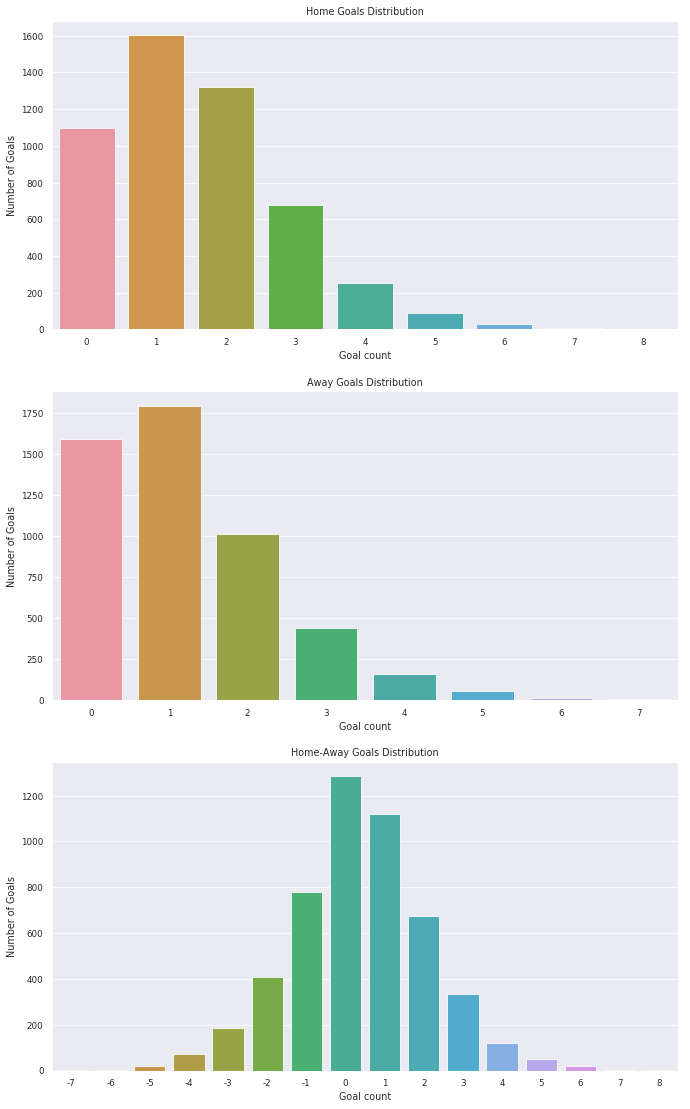

In [12]:
matches_wo_na=matches.loc[~(matches["match_hometeam_score"]).isna()|~(matches["match_awayteam_score"]).isna()]
home_scores=matches_wo_na["match_hometeam_score"].astype(int)
away_scores=matches_wo_na["match_awayteam_score"].astype(int)
home_away=(home_scores-away_scores).astype(int)
fig,ax=plt.subplots(3,figsize=(10,18))
for i in ax:
    i.set_xlabel("Goal count")
    i.set_ylabel("Number of Goals")
ax[0].set_title("Home Goals Distribution")
ax[1].set_title("Away Goals Distribution")
ax[2].set_title("Home-Away Goals Distribution")
sns.barplot(x=home_scores.value_counts().index,y=home_scores.value_counts().values,ax=ax[0])
sns.barplot(x=away_scores.value_counts().index,y=away_scores.value_counts().values,ax=ax[1])
sns.barplot(x=home_away.value_counts().index,y=home_away.value_counts().values,ax=ax[2])

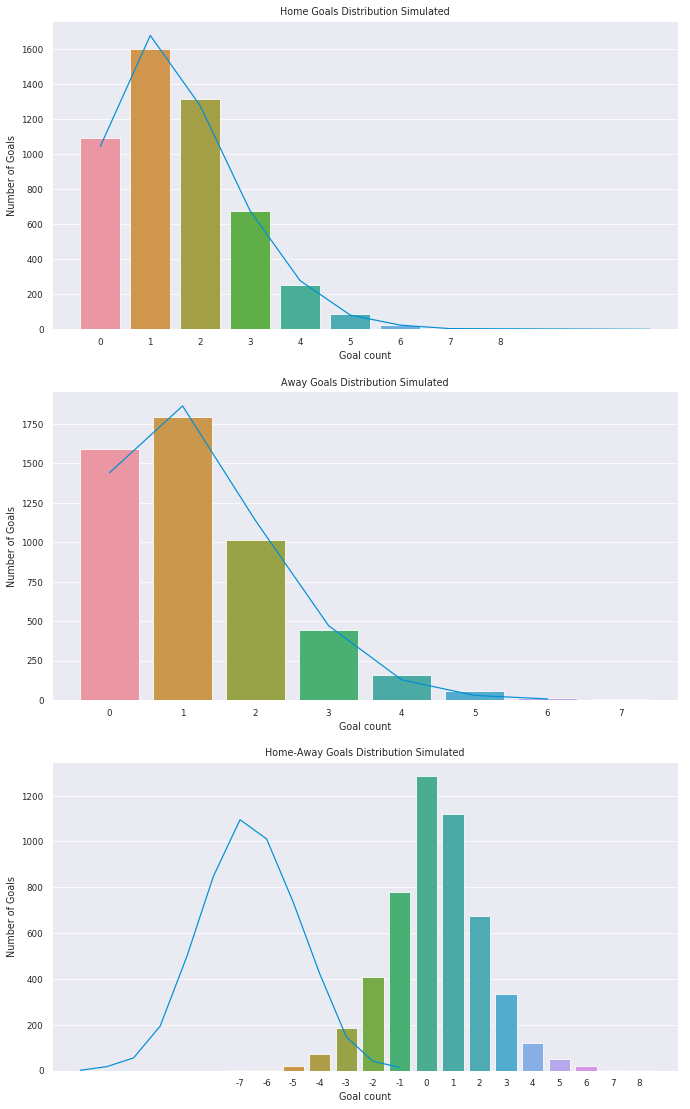

In [50]:
fig,ax=plt.subplots(3,figsize=(10,18))
for i in ax:
    i.set_xlabel("Goal count")
    i.set_ylabel("Number of Goals")
ax[0].set_title("Home Goals Distribution Simulated")
ax[1].set_title("Away Goals Distribution Simulated")
ax[2].set_title("Home-Away Goals Distribution Simulated")
sns.barplot(x=home_scores.value_counts().index,y=home_scores.value_counts().values,ax=ax[0])
sns.barplot(x=away_scores.value_counts().index,y=away_scores.value_counts().values,ax=ax[1])
sns.barplot(x=home_away.value_counts().index,y=home_away.value_counts().values,ax=ax[2])
for i,arr in enumerate([home_scores,away_scores]):
    home_poisson=np.random.poisson(arr.mean(), len(arr))
    unq,counts=np.unique(home_poisson,return_counts=True)
    sns.lineplot(x=unq,y=counts,ax=ax[i])
a=np.random.normal(home_away.mean(),home_away.std(),size=len(home_away))
a=pd.Series(a.round().astype(int))
sns.lineplot(x=a.value_counts().index,y=a.value_counts().values,ax=ax[2])

In [0]:
# largest counts of 4 bookmakers are chosen
bets.odd_bookmakers.value_counts()[0:4]

1xBet          115558
18bet           73531
Marathonbet     66810
bet365          65824
Name: odd_bookmakers, dtype: int64

In [0]:
bets.loc[(bets["odd_bookmakers"]=="10Bet")&(bets["variable"]=="odd_1")&(bets["match_id"]==242232)]
# there is more than one odd for each match, probably indication of live betting

,match_id,odd_bookmakers,odd_epoch,variable,value
2020922,242232,10Bet,1569609019,odd_1,2.15
2025814,242232,10Bet,1569644964,odd_1,2.15
2057637,242232,10Bet,1569896139,odd_1,2.40
2081706,242232,10Bet,1569984446,odd_1,2.35
2099459,242232,10Bet,1570010872,odd_1,2.35


In [0]:
bookmakers=["1xBet",        
"18bet",
"Marathonbet",
"bet365"]
bets_mod=bets.loc[(bets["odd_bookmakers"].isin(bookmakers))&(bets["variable"].isin(["odd_1","odd_2","odd_x"]))]
bets_mod["probs"]=1/bets_mod["value"]
# data has value 0
ids_tbd=bets_mod.loc[bets_mod["value"]==0]["match_id"].value_counts().index
bets_mod=bets_mod.loc[~bets_mod["match_id"].isin(ids_tbd)]
del bets_mod["odd_epoch"]
bets_mod.sample(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,match_id,odd_bookmakers,variable,value,probs
226661,181589,1xBet,odd_2,2.39,0.418410
356146,207344,Marathonbet,odd_1,2.63,0.380228
486779,161001,Marathonbet,odd_x,3.46,0.289017
1201529,187725,1xBet,odd_2,1.60,0.625000
2044457,227561,1xBet,odd_x,3.60,0.277778
822162,166028,1xBet,odd_1,2.33,0.429185
744940,167049,1xBet,odd_1,2.17,0.460829
953324,174047,Marathonbet,odd_2,3.18,0.314465
894524,171745,bet365,odd_1,2.60,0.384615
1274840,194894,Marathonbet,odd_x,3.13,0.319489


In [0]:
bets_pivoted=pd.pivot_table(bets_mod,values=["value","probs"],columns=["variable"],index=["match_id","odd_bookmakers"]).reset_index()
bets_pivoted.columns=["match_id","odd_bookmakers","probs_1","probs_2","probs_x","value_1","value_2","value_x"]
bets_pivoted["probs_2"]=bets_pivoted["probs_2"]/(bets_pivoted["probs_2"]+bets_pivoted["probs_x"]+bets_pivoted["probs_1"])
bets_pivoted["probs_1"]=bets_pivoted["probs_1"]/(bets_pivoted["probs_2"]+bets_pivoted["probs_x"]+bets_pivoted["probs_1"])
bets_pivoted["probs_x"]=bets_pivoted["probs_x"]/(bets_pivoted["probs_2"]+bets_pivoted["probs_x"]+bets_pivoted["probs_1"])
bets_pivoted["home_minus_away"]=bets_pivoted["probs_1"]-bets_pivoted["probs_2"]
bets_pivoted.head(20)

,match_id,odd_bookmakers,probs_1,probs_2,probs_x,value_1,value_2,value_x,home_minus_away
0,145899,18bet,0.178947,0.625059,0.224355,5.35,1.43,4.30,-0.446113
1,145899,1xBet,0.153083,0.647655,0.207835,6.45,1.49,4.76,-0.494572
2,145899,Marathonbet,0.130011,0.669958,0.208340,7.60,1.44,4.75,-0.539947
3,145899,bet365,0.175462,0.632184,0.215777,5.50,1.44,4.50,-0.456722
4,145900,18bet,0.449293,0.317232,0.265994,2.06,2.82,3.60,0.132061
5,145900,1xBet,0.444763,0.305581,0.270180,2.14,3.05,3.60,0.139182
6,145900,Marathonbet,0.420731,0.338353,0.251534,2.32,2.85,3.92,0.082377
7,145900,bet365,0.454818,0.293023,0.270839,2.10,3.20,3.60,0.161795
8,147984,1xBet,0.456969,0.265704,0.308615,2.02,3.38,3.10,0.191265
9,147984,bet365,0.460421,0.263381,0.308282,2.00,3.40,3.10,0.197040


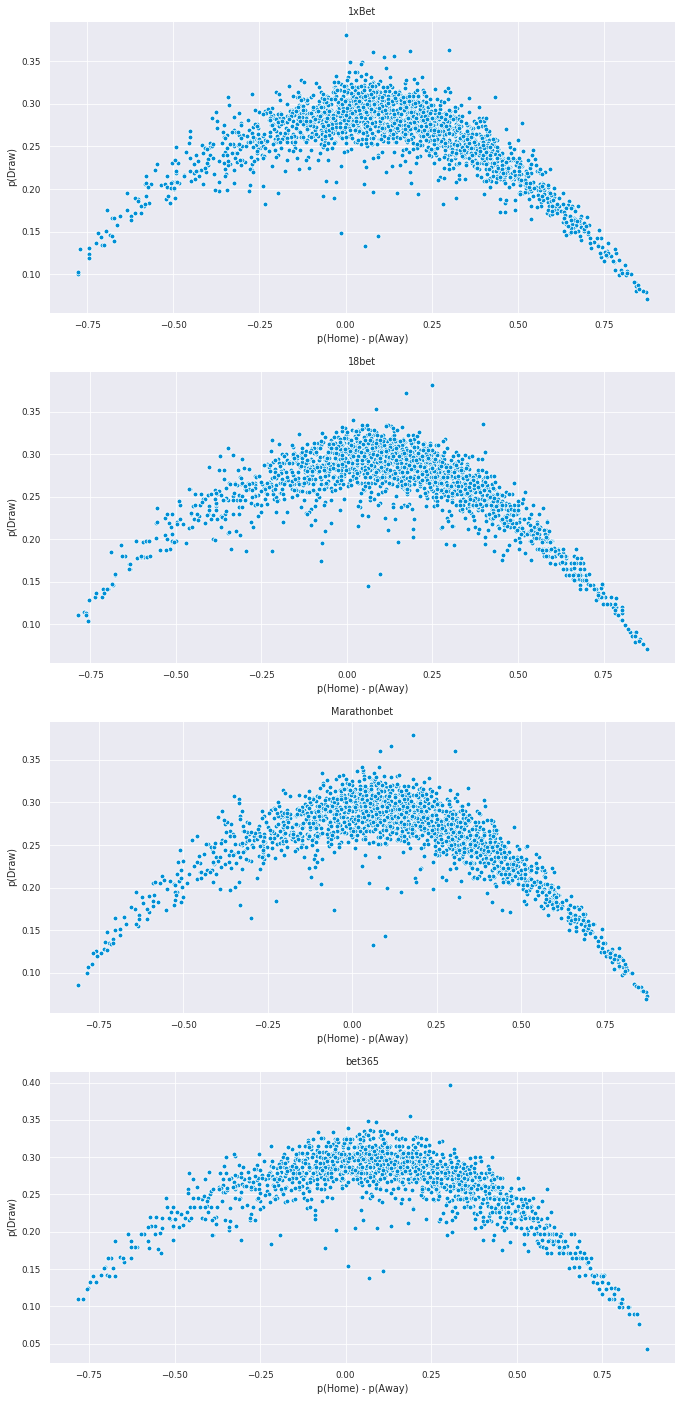

In [0]:
_,axx=plt.subplots(4,figsize=(10,23))
for i,bm in enumerate(bookmakers):
    bm_bets=bets_pivoted.loc[bets_pivoted["odd_bookmakers"]==bm]
    sns.scatterplot(x=bm_bets["home_minus_away"], y=bm_bets["probs_x"],ax=axx[i])
    axx[i].set_title(bm)
    axx[i].set_xlabel("p(Home) - p(Away)")
    axx[i].set_ylabel("p(Draw)")

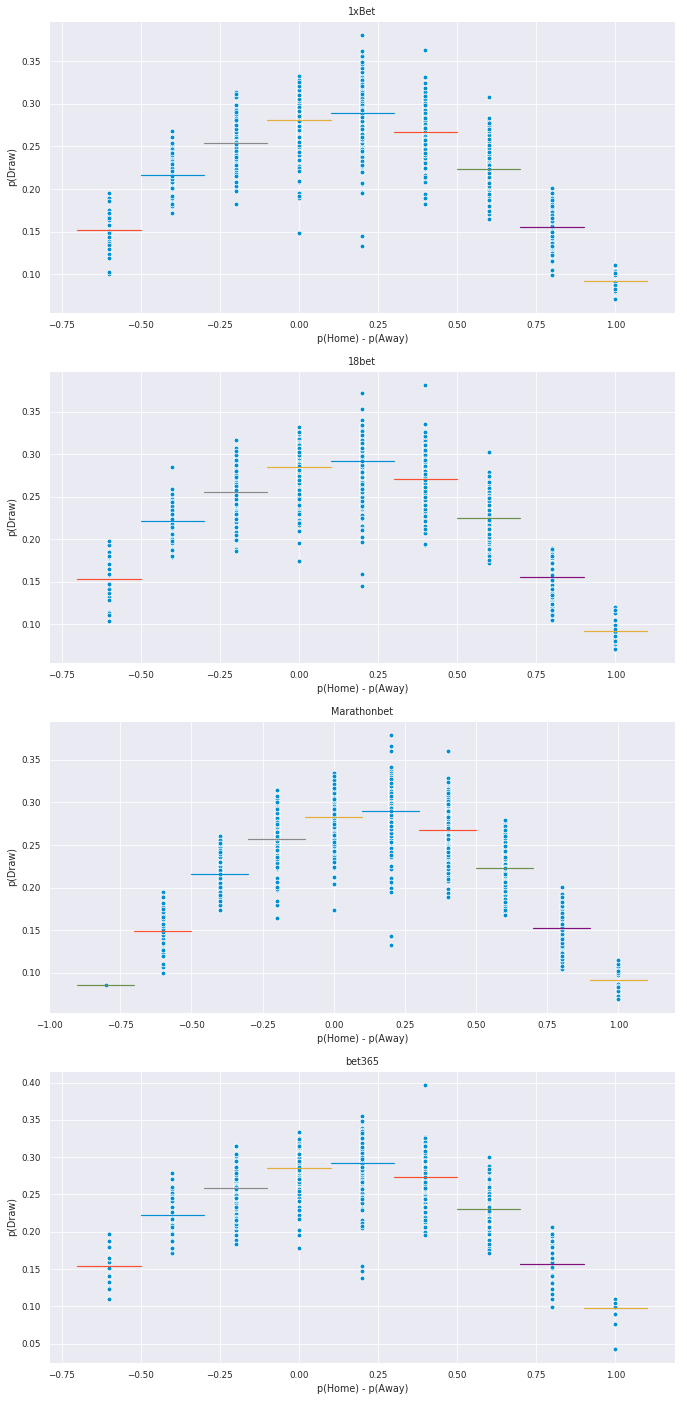

In [0]:
bets_pivoted["home_minus_away_disc"]=bets_pivoted["home_minus_away"].apply(lambda x:-0.8 if -1<x<=-0.8 
                                            else -0.6 if -0.8<x<=-0.6
                                            else -0.4 if -0.6<x<=-0.4
                                            else -0.2 if -0.4<x<=-0.2
                                            else 0 if -0.2<x<=0
                                            else 0.2 if 0<x<=0.2
                                            else 0.4 if 0.2<x<=0.4
                                            else 0.6 if 0.4<x<=0.6
                                            else 0.8 if 0.6<x<=0.8
                                            else 1)
_,axx=plt.subplots(4,figsize=(10,23))
for i,bm in enumerate(bookmakers):
    bm_bets=bets_pivoted.loc[bets_pivoted["odd_bookmakers"]==bm]
    sns.scatterplot(x=bm_bets["home_minus_away_disc"], y=bm_bets["probs_x"],ax=axx[i])
    for prob in bm_bets["home_minus_away_disc"].value_counts().index:
        mean_=bm_bets.loc[bm_bets["home_minus_away_disc"]==prob]["probs_x"].mean()
        sns.lineplot(x=[prob-0.1,prob+0.1],y=[mean_,mean_],ax=axx[i])
    axx[i].set_title(bm)
    axx[i].set_xlabel("p(Home) - p(Away)")
    axx[i].set_ylabel("p(Draw)")

In [0]:
outlier_goals=goals.loc[goals["time"].str.contains("90\+")].time.value_counts().index.tolist()
goals_mod=goals.loc[goals["time"].isin(outlier_goals)]
goals_mod["diff"]=goals_mod["score"].apply(lambda x: int(x.split(" - ")[1])-int(x.split(" - ")[0]))
goals_mod=goals_mod.loc[goals_mod["diff"].isin([-1,0,1])]
goals_mod
# 283 mac var bu olayın oldugu

In [0]:
booking["whos_fault"]=np.where(booking["home_fault"].isna(),"away","home") # this wasnt necessary but i wanted to keep it anyway
booking_mod=booking.drop(booking.loc[booking["time"].str.contains("\+")].index)
booking_mod=booking_mod.loc[(booking_mod["time"].astype(int)<20)&(booking_mod["card"]=="red card")]
booking_mod
# 44 mac var bu olayın oldugu

In [0]:
# matches concated
unq_match_outlier=booking_mod["match_id"].values.astype(int).tolist()
for i in goals_mod["match_id"].values:
    unq_match_outlier.append(i)
unq_match_outlier=np.unique(unq_match_outlier)
unq_match_outlier

array([ 13278,  13296,  13392,  13402,  13420,  13422,  13450,  16479,
        16498,  16503,  17633,  24569,  24573,  30338,  41181,  41184,
        45246,  45255,  45257,  45263,  45274,  45284,  45338,  45356,
        45363,  45369,  45381,  55266,  58518,  58522,  59088,  59093,
        59101,  59627,  62475,  62477,  62483,  63001,  63011,  63408,
        63572,  63578,  63816,  64442,  64757,  64884,  66081,  66293,
        66303,  66530,  66802,  67049,  67259,  67756,  67770,  67896,
        68013,  68062,  68390,  69167,  69171,  69437,  69519,  69913,
        70208,  70291,  70547,  70553,  70820,  71626,  71645,  71956,
        73426,  74244,  74250,  75082,  75891,  77033,  77164,  78130,
        78572,  79347,  79348,  79929,  81154,  81778,  81844,  81847,
        81851,  81856,  82561,  83075,  83801,  83804,  86312,  88134,
        89096,  89629,  89649,  91795,  91797,  92561,  94272,  94284,
        96789,  96800,  97644,  98128,  98598,  98608,  98614,  99342,
      

In [0]:
len(unq_match_outlier)
# sadece 311 mac var

311

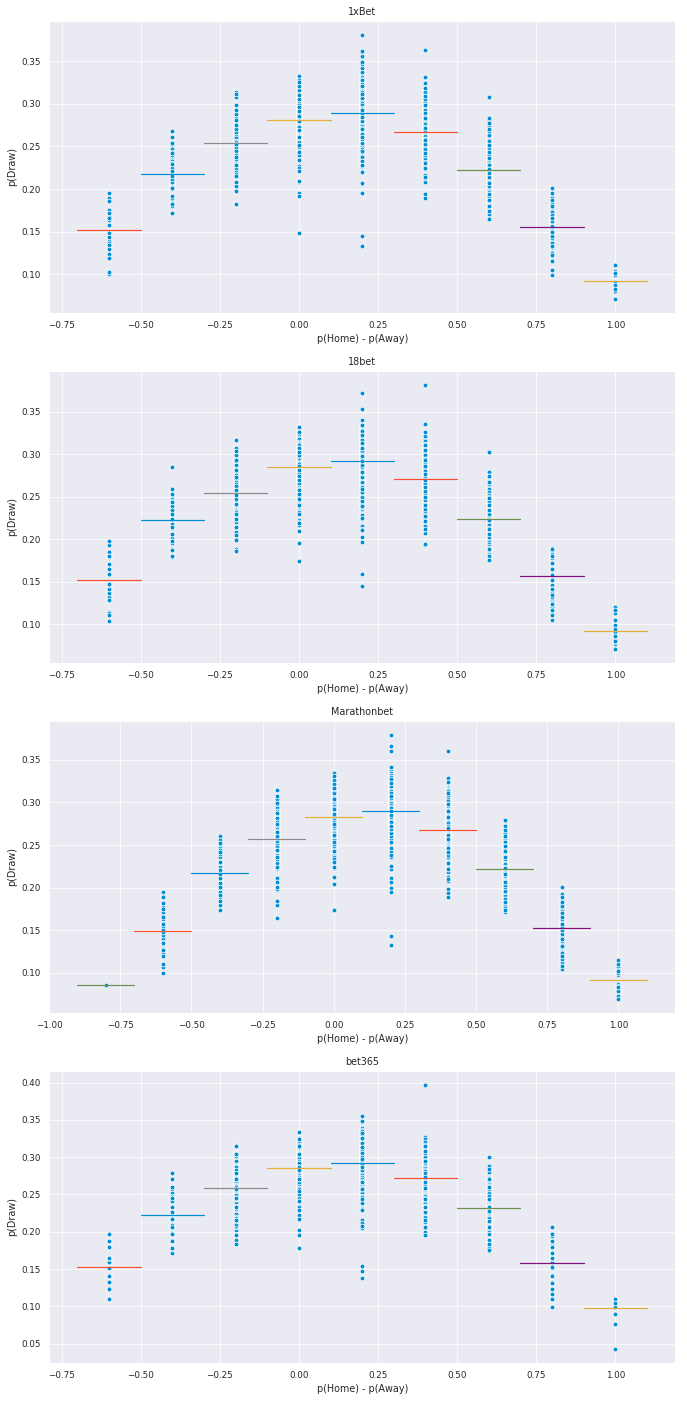

In [0]:
_,axx=plt.subplots(4,figsize=(10,23))
bets_pivoted_n=bets_pivoted.loc[~bets_pivoted["match_id"].isin(unq_match_outlier)]
for i,bm in enumerate(bookmakers):
    bm_bets=bets_pivoted_n.loc[bets_pivoted_n["odd_bookmakers"]==bm]
    sns.scatterplot(x=bm_bets["home_minus_away_disc"], y=bm_bets["probs_x"],ax=axx[i])
    for prob in bm_bets["home_minus_away_disc"].value_counts().index:
        mean_=bm_bets.loc[bm_bets["home_minus_away_disc"]==prob]["probs_x"].mean()
        sns.lineplot(x=[prob-0.1,prob+0.1],y=[mean_,mean_],ax=axx[i])
    axx[i].set_title(bm)
    axx[i].set_xlabel("p(Home) - p(Away)")
    axx[i].set_ylabel("p(Draw)")

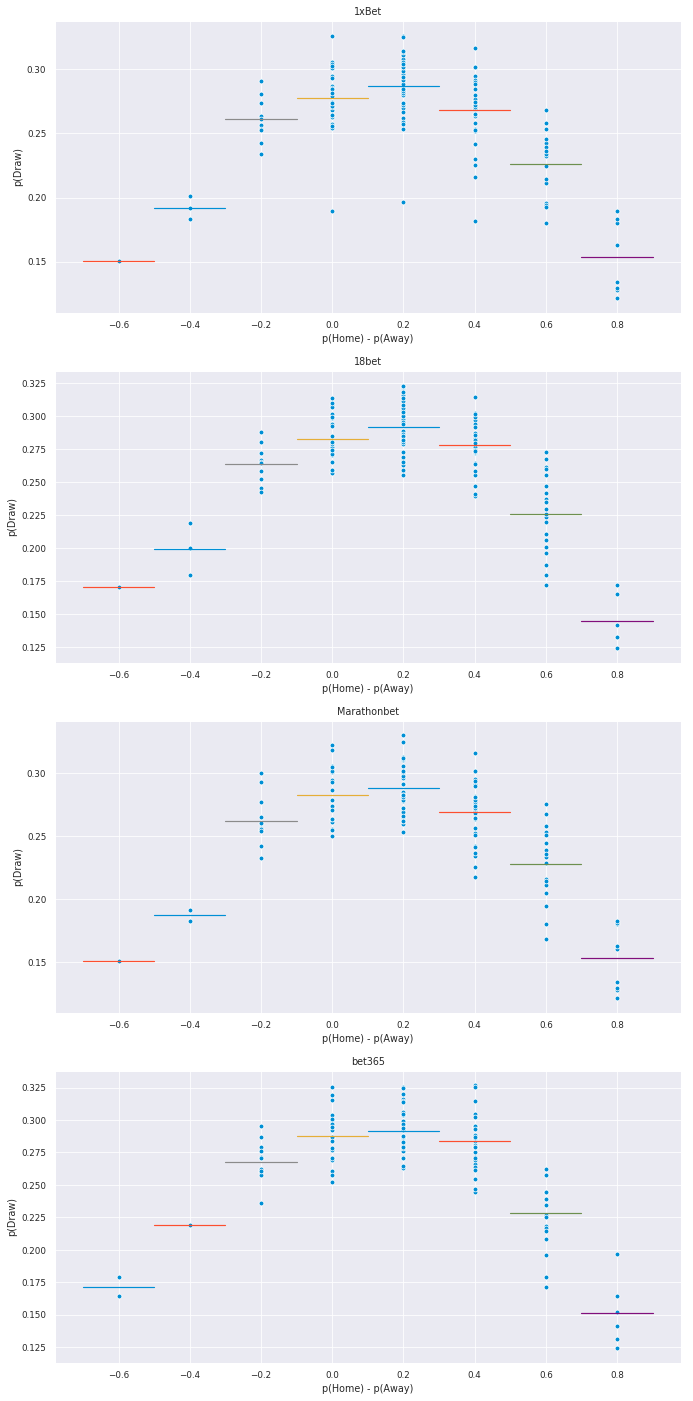

In [0]:
_,axx=plt.subplots(4,figsize=(10,23))
bets_pivoted_n=bets_pivoted.loc[bets_pivoted["match_id"].isin(unq_match_outlier)]
for i,bm in enumerate(bookmakers):
    bm_bets=bets_pivoted_n.loc[bets_pivoted_n["odd_bookmakers"]==bm]
    sns.scatterplot(x=bm_bets["home_minus_away_disc"], y=bm_bets["probs_x"],ax=axx[i])
    for prob in bm_bets["home_minus_away_disc"].value_counts().index:
        mean_=bm_bets.loc[bm_bets["home_minus_away_disc"]==prob]["probs_x"].mean()
        sns.lineplot(x=[prob-0.1,prob+0.1],y=[mean_,mean_],ax=axx[i])
    axx[i].set_title(bm)
    axx[i].set_xlabel("p(Home) - p(Away)")
    axx[i].set_ylabel("p(Draw)")